# Assignment 5B

## About

This weeks assignment is all about Quantum Fourier Transform.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit_aer import AerSimulator

## Excercises

### 1

Implement a function QFT2(qc) that takes a 2-qubit quantum circuit as an argument and adds the necessary gates for a QFT at the end (imagine that whatever gates come before the QFT are there to prepare the input state).

The function should not add measurements as these are technically not part of the QFT.

In [2]:
def QFT2(qc: QuantumCircuit):
    qc.h(1)
    qc.cp(np.pi/(2**(2-1)), control_qubit=1, target_qubit=0)
    qc.h(0)
    qc.swap(1,0)
    return qc

# qft2 = QFT2(QuantumCircuit(2))
# qft2.draw("mpl", reverse_bits=True)

### 2

Generalize your function QFT2(qc) to QFT(qc), so that it works for any circuit of n qubits.

In [3]:
def QFT(qc: QuantumCircuit):
    n = qc.num_qubits
    for qbit_n in range(0, n)[::-1]:
        # print(qbit_n)
        qc.h(qbit_n)
        for target in range(qbit_n-1, -1, -1):
            gate_idx = qbit_n-target
            qc.cp(np.pi/(2**(gate_idx)), control_qubit=qbit_n, target_qubit=target)
        qc.barrier()
    for i in range(0, n//2):
        qc.swap(i, n-i-1)
    return qc

# qft = QFT(QuantumCircuit(2))
# qft.draw("mpl", reverse_bits=True)

### 3

Implement an analogous function QFT_inverse(qc) that constructs an inverse QFT at the end of the circuit.

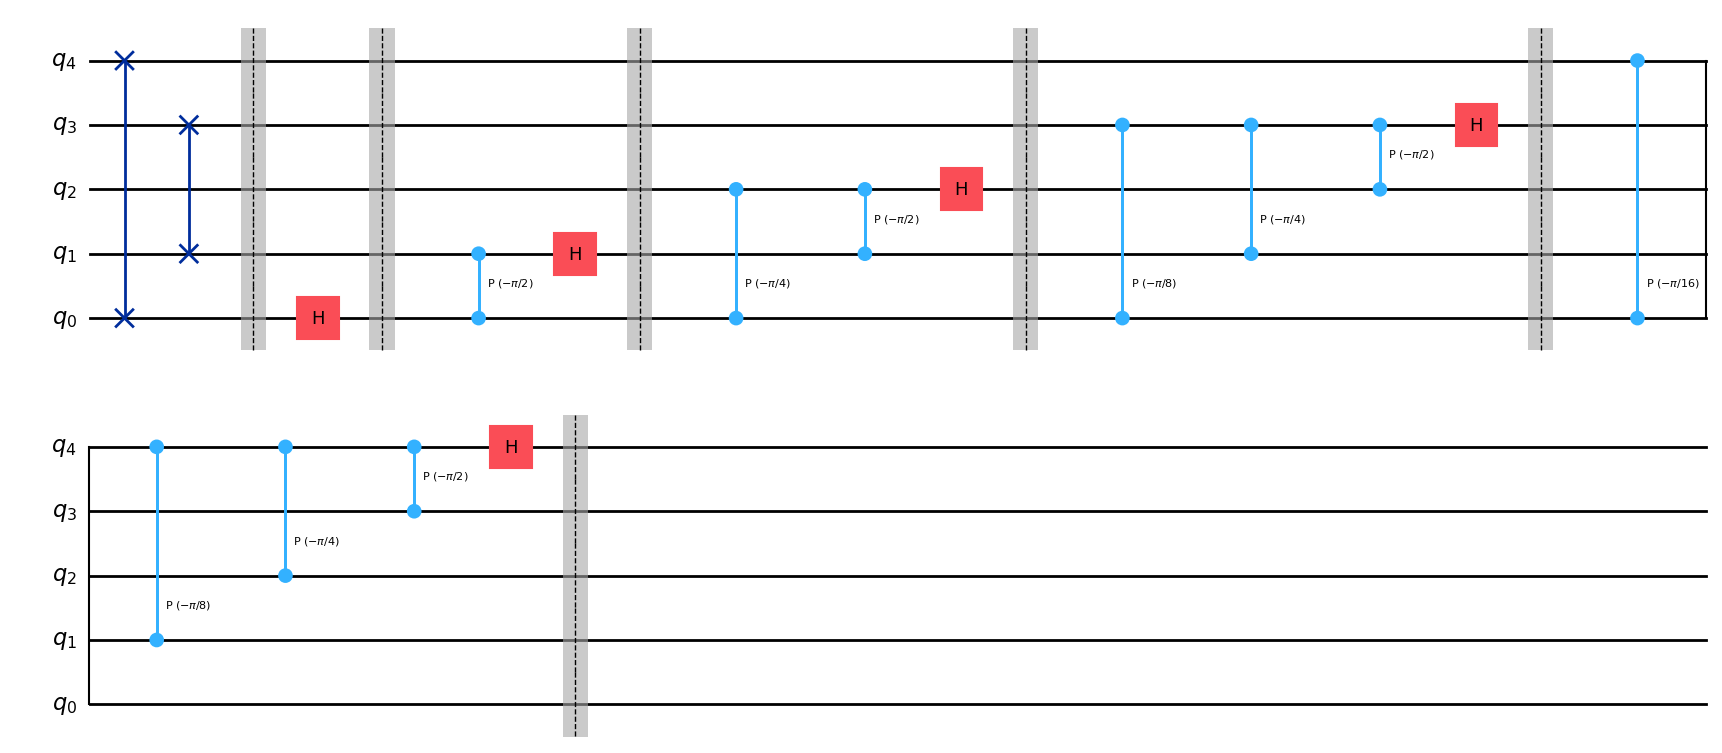

In [4]:
def QFT_inverse(qc: QuantumCircuit):
    n = qc.num_qubits
    for i in range(0, n//2):
        qc.swap(i, n-i-1)
    qc.barrier()
    for qbit_n in range(0, n):
        # print(qbit_n)
        for target in range(0, qbit_n):
            gate_idx = qbit_n-target
            qc.cp(-np.pi/(2**(gate_idx)), control_qubit=qbit_n, target_qubit=target)
        qc.h(qbit_n)
        qc.barrier()
    return qc

qft = QFT_inverse(QuantumCircuit(5))
qft.draw("mpl", reverse_bits=True)

### 4

Implement 3 different circuits that produce the following states:

a) $ \ket{00} \otimes \ket{\Phi^-} $

b) $ \ket{\Phi^-} \otimes \ket{\Phi^+} $

c) $ \ket{+101+} $

In [5]:
def a():
    qc = QuantumCircuit(4)
    qc.x(1)
    qc.h(1)
    qc.cx(1,0)
    qc.barrier()
    
    return qc

def b():
    qc = QuantumCircuit(4)
    qc.x(3)
    qc.h(3)
    qc.cx(3,2)

    qc.h(1)
    qc.cx(1,0)
    qc.barrier()

    return qc

def c():
    qc = QuantumCircuit(5)
    qc.h(4)
    qc.x(3)
    qc.x(1)
    qc.h(0)
    qc.barrier()

    return qc

# test = c()
# test.draw("mpl", reverse_bits=True)
# state = qi.Statevector(test)
# state.draw("latex")

### 5

For each of the three circuits a, b, and c, use your function QFT(qc) to add a QFT at the end. Then finally add a standard measurement und run the circuit with 10000 shots.

Plot a histogram with the results

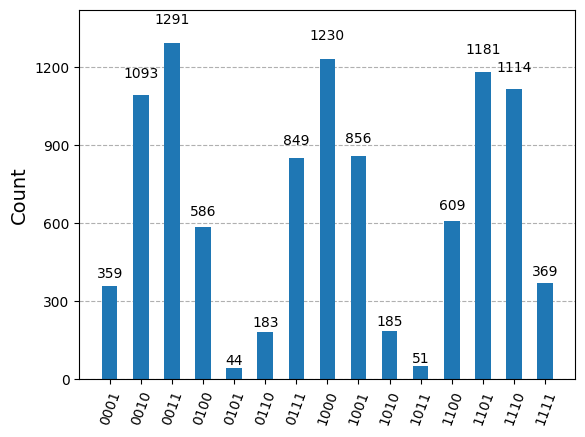

In [6]:
# circuit a

circ_a = QFT(a())
# circ_a.draw("mpl", reverse_bits=True)

circ_a.measure_all()
backend = AerSimulator()
transpiled_qc = transpile(circ_a, backend)
job = backend.run(transpiled_qc, shots=10000)
result = job.result()
plot_histogram(result.get_counts())

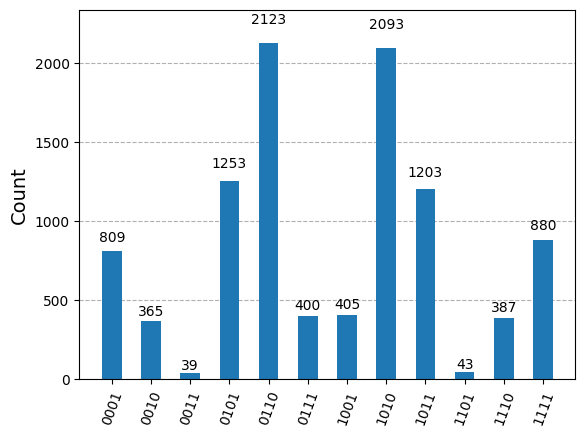

In [7]:
# circuit a

circ_b = QFT(b())
# circ_a.draw("mpl", reverse_bits=True)

circ_b.measure_all()
backend = AerSimulator()
transpiled_qc = transpile(circ_b, backend)
job = backend.run(transpiled_qc, shots=10000)
result = job.result()
plot_histogram(result.get_counts())

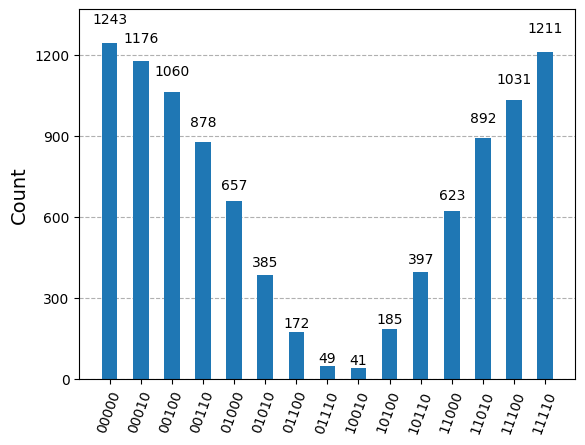

In [8]:
# circuit a

circ_c = QFT(c())

circ_c.measure_all()
backend = AerSimulator()
transpiled_qc = transpile(circ_c, backend)
job = backend.run(transpiled_qc, shots=10000)
result = job.result()
plot_histogram(result.get_counts())

### 6

For each of the three circuits a, b, and c, add a QFT and then an inverse QFT at the end. Finish with a standard measurement.

Does the result match your expectations?

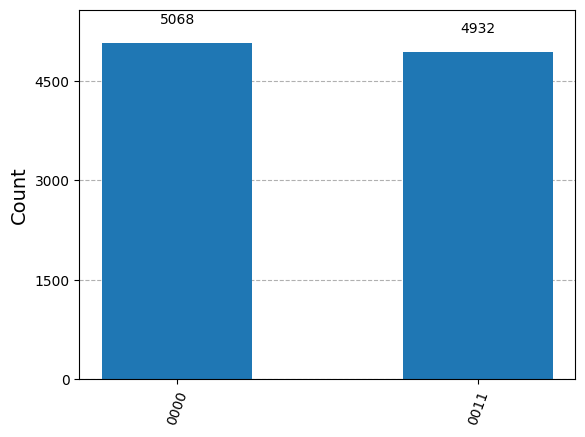

In [9]:
a_inverse = QFT_inverse(QFT(a()))
# a_inverse.draw("mpl", reverse_bits=True)
a_inverse.measure_all()
backend = AerSimulator()
transpiled_qc = transpile(a_inverse, backend)
job = backend.run(transpiled_qc, shots=10000)
result = job.result()
plot_histogram(result.get_counts())

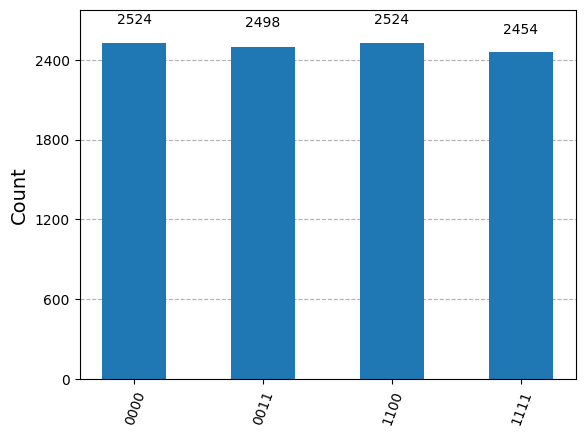

In [10]:
b_inverse = QFT_inverse(QFT(b()))
b_inverse.measure_all()
backend = AerSimulator()
transpiled_qc = transpile(b_inverse, backend)
job = backend.run(transpiled_qc, shots=10000)
result = job.result()
plot_histogram(result.get_counts())

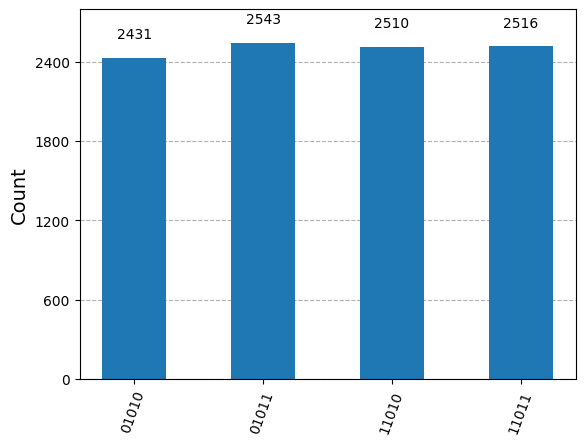

In [11]:
c_inverse = QFT_inverse(QFT(c()))
c_inverse.measure_all()
backend = AerSimulator()
transpiled_qc = transpile(c_inverse, backend)
job = backend.run(transpiled_qc, shots=10000)
result = job.result()
plot_histogram(result.get_counts())